In [1]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction, pipeline, metrics, linear_model, naive_bayes, tree
from sklearn.model_selection import train_test_split 

In [2]:
df= pd.read_csv(r"C:\Users\DIBYOJIT\Downloads\Language Detection\Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
eng_df= df[df['Language']=="English"]
eng_df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
eng_df.shape

(1385, 2)

In [5]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [6]:
for lang in df['Language'].unique():
    lang_df= df[df["Language"]==lang]
    for ger_df in lang_df["Language"]:
        if ger_df=="German":
            german_df= lang_df[lang_df["Language"]==ger_df]
            print(german_df.head())
        elif ger_df=="French":
            french_df= lang_df[lang_df["Language"]==ger_df]

                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                          Wie wäre es also mit uns?   German
9501  Lernen Sie einige intelligente neue englische ...   German
9502  Also werden wir heute 10 neue intelligente Wör...   German
                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                          Wie wäre es also mit uns?   German
9501  Lernen Sie einige intelligente neue englische ...   German
9502  Also werden wir heute 10 neue intelligente Wör...   German
                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                     

                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                          Wie wäre es also mit uns?   German
9501  Lernen Sie einige intelligente neue englische ...   German
9502  Also werden wir heute 10 neue intelligente Wör...   German
                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                          Wie wäre es also mit uns?   German
9501  Lernen Sie einige intelligente neue englische ...   German
9502  Also werden wir heute 10 neue intelligente Wör...   German
                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                     

                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                          Wie wäre es also mit uns?   German
9501  Lernen Sie einige intelligente neue englische ...   German
9502  Also werden wir heute 10 neue intelligente Wör...   German
                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                          Wie wäre es also mit uns?   German
9501  Lernen Sie einige intelligente neue englische ...   German
9502  Also werden wir heute 10 neue intelligente Wör...   German
                                                   Text Language
9498  .Wir sind alle auf der Suche nach schnellen We...   German
9499  Ich weiß, ich verstehe, was passiert, ist, das...   German
9500                     

In [7]:
german_df

,Text,Language
9498,.Wir sind alle auf der Suche nach schnellen We...,German
9499,"Ich weiß, ich verstehe, was passiert, ist, das...",German
9500,Wie wäre es also mit uns?,German
9501,Lernen Sie einige intelligente neue englische ...,German
9502,Also werden wir heute 10 neue intelligente Wör...,German
...,...,...
9963,narcisa änderte ihre art und weise sie kämpfte...,German
9964,Wie' s Narzissmus jetzt erzählt Marian beiden ...,German
9965,"Hat sie, ich denke, sie würde jetzt kein Goldb...",German
9966,"Terry, du siehst tatsächlich ein bisschen wie ...",German


In [8]:
french_df

,Text,Language
3250,Si vous disposez d'ouvrages ou d'articles de r...,French
3251,Comment ajouter mes sources ?,French
3252,Cette page ou section est en train d'être trad...,French
3253,Vous pouvez aider au développement de Wikipédi...,French
3254,Le mot nature est un terme polysémique (c’est-...,French
...,...,...
4259,"quelle a été votre erreur, nous allons vous no...",French
4260,"narcisa a changé ses manières, elle a lutté au...",French
4261,Comment' Le narcissisme de s maintenant marian...,French
4262,a-t-elle je suppose qu'elle ne voudrait plus d...,French


In [9]:
for lang in df['Language'].unique():
    lang_df= df[df["Language"]==lang]
    for ger_df in lang_df["Language"]:
        if ger_df=="Spanish":
            Spanish_df= lang_df[lang_df["Language"]==ger_df]
        elif ger_df=="Italian":
            ita_df=  lang_df[lang_df["Language"]==ger_df]
            print(Spanish_df.head())

                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una period

                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una period

                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una period

                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una period

                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una periodicidad semanal, la revista ...  Spanish
4813  Nature tiene oficinas en Londres, Nueva York, ...  Spanish
4814  La editorial publica también varias revistas e...  Spanish
                                                   Text Language
4810  Nature es una de las más prestigiosas revistas...  Spanish
4811  Su primer número fue publicado el 4 de noviemb...  Spanish
4812  [2]​ Con una period

In [10]:
ita_df.head()

,Text,Language
7114,Nature è una delle più antiche ed importanti r...,Italian
7115,[1] Viene pubblicata fin dal 4 novembre 1869.,Italian
7116,[2] Nonostante la maggior parte delle riviste ...,Italian
7117,"Molti sono gli avanzamenti e le scoperte, prov...",Italian
7118,Il fattore di impatto (impact factor) di quest...,Italian


In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
for char in string.punctuation:
    print(char, end=" ")
    translate_table= dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [13]:
data_eng= []
lang_eng= []
for i, rows in eng_df.iterrows():
    rows= rows['Text']
    if len(rows)!=0:
        rows= rows.lower()
        rows= re.sub(r"\d+", "", rows)
        rows= rows.translate(translate_table)
        data_eng.append(rows)
        lang_eng.append("English")

In [14]:
data_fre= []
lang_fre= []
for i, rows2 in french_df.iterrows():
    rows2= rows2['Text']
    if len(rows2)!=0:
        rows2= rows2.lower()
        rows2= re.sub(r"\d+", "", rows2)
        rows2= rows2.translate(translate_table)
        data_fre.append(rows2)
        lang_fre.append("French")

In [15]:
data_ger= []
lang_ger= []
for i, rows3 in german_df.iterrows():
    rows3= rows3['Text']
    if len(rows3)!=0:
        rows3= rows3.lower()
        rows3= re.sub(r"\d+", "", rows3)
        rows3= rows3.translate(translate_table)
        data_ger.append(rows3)
        lang_ger.append("French")

In [16]:
data_ita= []
lang_ita= []
for i, rows4 in ita_df.iterrows():
    rows4= rows4['Text']
    if len(rows4)!=0:
        rows4= rows4.lower()
        rows4= re.sub(r"\d+", "", rows4)
        rows4= rows4.translate(translate_table)
        data_ita.append(rows4)
        lang_ita.append("French")

In [17]:
data_spa= []
lang_spa= []
for i, rows5 in Spanish_df.iterrows():
    rows5= rows5['Text']
    if len(rows5)!=0:
        rows5= rows5.lower()
        rows5= re.sub(r"\d+", "", rows)
        rows5= rows5.translate(translate_table)
        data_spa.append(rows5)
        lang_spa.append("Spanish")

In [18]:
data_spa

['terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel though what am i seeing how could you be him you two are so nice',
 'terry you actually look a little like that angel thoug

In [19]:
new_df= pd.DataFrame({
    "Text": data_eng+data_fre+data_ger+data_ita+data_spa,
    "Language": lang_eng+lang_fre+lang_ger+lang_ita+lang_spa
})
new_df.head()

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old fren...,English


In [21]:
new_df["Language"].unique()

array(['English', 'French', 'Spanish'], dtype=object)

In [22]:
x,y = new_df.iloc[:,0], new_df.iloc[:,1]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=np.random.seed(123))

In [23]:
print(x_train.shape,  y_train.shape,  x_test.shape, y_test.shape)

(3508,) (3508,) (878,) (878,)


In [24]:
vectorizer= feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer="char")

pipe_lr= pipeline.Pipeline([
    ("vectorizer", vectorizer),
    ("clf", linear_model.LogisticRegression())
])

In [25]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [26]:
y_pred= pipe_lr.predict(x_test)
y_pred[:5]

array(['French', 'English', 'English', 'French', 'Spanish'], dtype=object)

In [27]:
y_test[:5]

1417     French
1068    English
882     English
1807     French
4367    Spanish
Name: Language, dtype: object

In [28]:
acc= metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc*100, "%")

Accuracy:  99.54441913439635 %


In [29]:
matrix= metrics.confusion_matrix(y_test, y_pred)
print( matrix)

[[272   3   1]
 [  0 422   0]
 [  0   0 180]]


<Axes: >

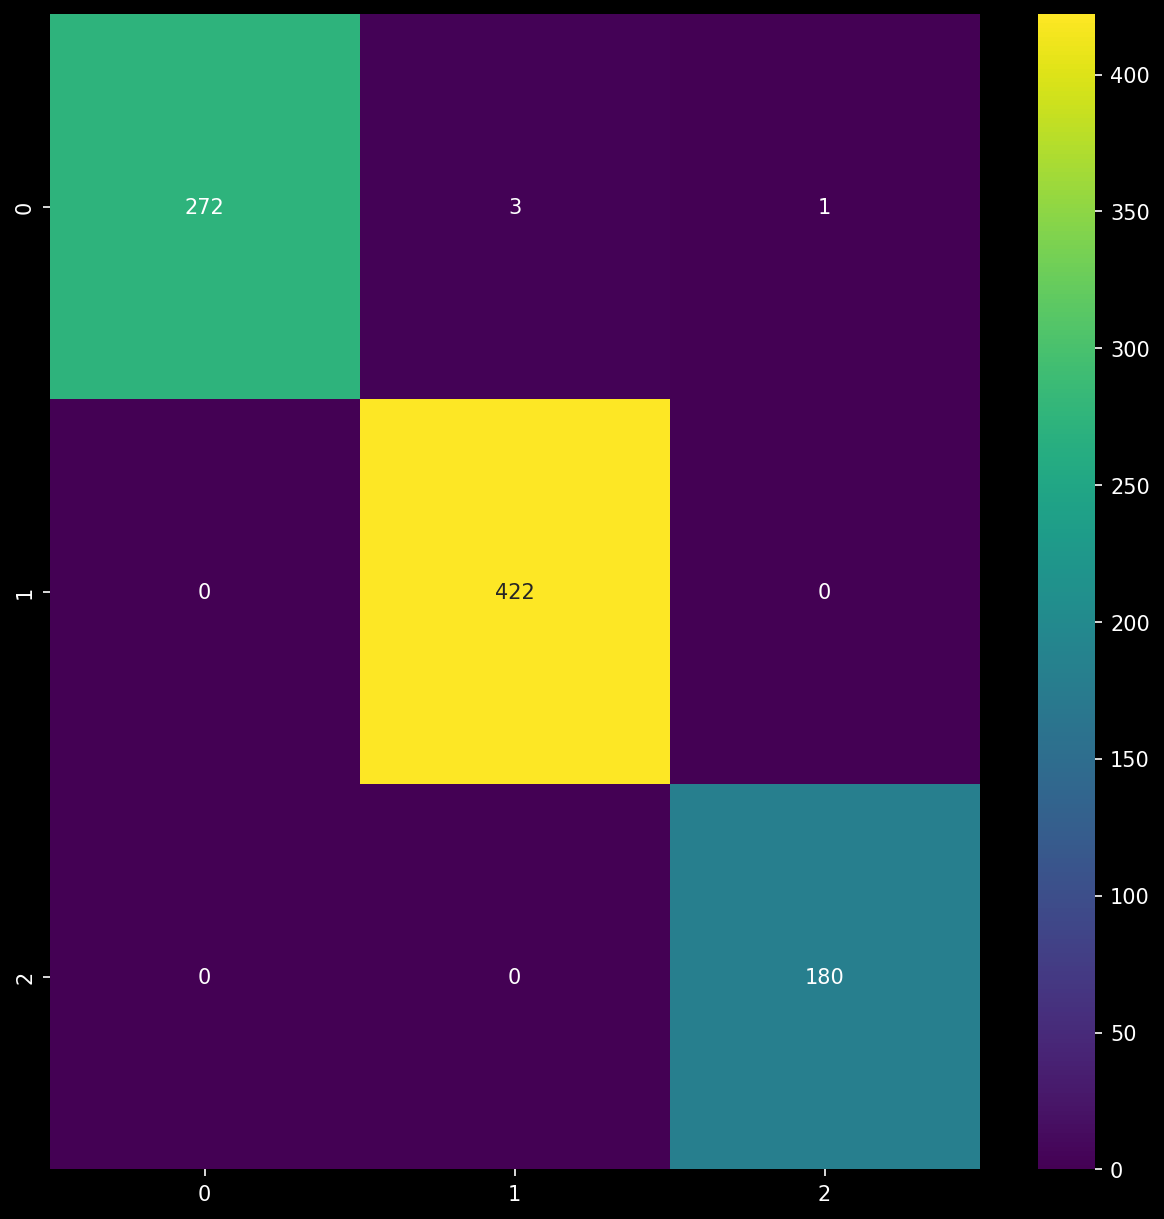

In [30]:
plt.style.use("dark_background")
plt.figure(figsize=(10,10), dpi=150)
import seaborn as sn
sn.heatmap(matrix, fmt='d', annot=True, cmap="viridis")

# WITH  DECISION TREE REGRESSION

In [31]:
vectorizer= feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer="char")

pipe= pipeline.Pipeline([
    ("vectorizer", vectorizer),
    ("decision", tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=2))
])

In [32]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('decision',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=4))])

In [33]:
prediction= pipe.predict(x_test)
prediction[:5]

array(['French', 'English', 'English', 'French', 'Spanish'], dtype=object)

In [34]:
acc= metrics.accuracy_score(y_test, prediction)
print("Accuracy: ", acc*100, "%")

Accuracy:  97.38041002277905 %


In [35]:
matrix= metrics.confusion_matrix(y_test, prediction)
print( matrix)

[[258  17   1]
 [  4 417   1]
 [  0   0 180]]


<Axes: >

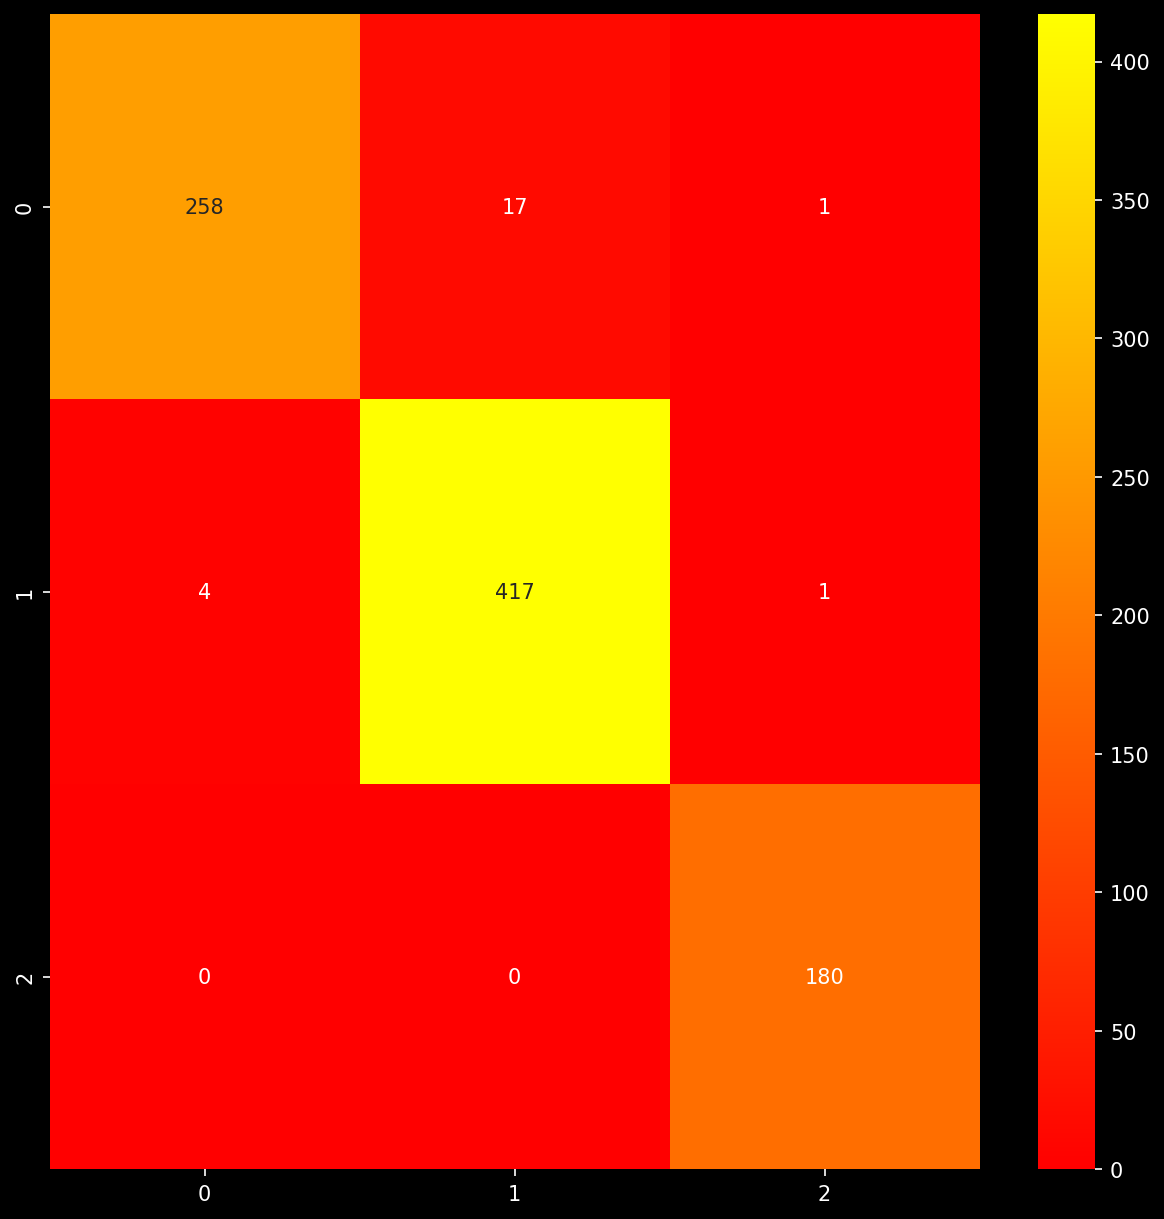

In [36]:
plt.style.use("dark_background")
plt.figure(figsize=(10,10), dpi=150)
import seaborn as sn
sn.heatmap(matrix, fmt='d', annot=True, cmap="autumn")

In [38]:
import pickle
file= open("DR.pckl", "wb")
pickle.dump(pipe, file)
file.close()

In [40]:
global OpenFile
OpenFile= open("DR.pckl", "rb")
OpenModel= pickle.load(OpenFile)
OpenFile.close()

In [43]:
text= "Hello1. How2 are3 you4?"
text= "".join(text.split())
text=text.lower()
text= re.sub(r"\d", "", text)
text= text.translate(translate_table)
predict= OpenModel.predict([text])
print(predict)

['English']


In [45]:
text= "Hola como estas?"
text= "".join(text.split())
text=text.lower()
text= re.sub(r"\d", "", text)
text= text.translate(translate_table)
predict= OpenModel.predict([text])
print(predict)

['French']
